In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import vaex


In [2]:
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%time

df_train = vaex.from_csv("./Datasets/train.csv", convert = True, chunk_size = 3_000_000)

Wall time: 71 ms


In [4]:
df_train.tail()

#,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,499,2.96727,0.000297515,0.000297515,-0.0053925,-0.0124719,-0.00668118,-1,-0.779554,-0.597258,0.674234,0.735692,-0.153732,-0.165179,-0.175335,-0.193784,-0.80156,-0.393694,-0.320222,-0.526467,-0.256197,-0.0952112,-0.375613,-0.276567,-0.263636,-0.459801,-0.835249,-1.31091,-0.738298,-0.515071,-0.824567,-1.35551,-1.0343,-1.5067,0.396471,0.700967,1.02496,1.6815,0.77983,1.54871,0.724329,0.950487,1.29476,1.59344,-0.29056,-0.352783,1.58592,3.17322,0.619381,2.57133,-0.447906,-0.0507792,-0.950054,-0.412035,-0.391826,-0.214283,-0.0313076,-1.3178,0.828586,-1.88739,0.17049,-1.83406,0.854159,0.817421,-0.853525,-1.30954,-0.0833318,7.33023,6.72445,1.09421,1.13689,5.85262,-0.741456,-0.54119,5.3963,5.30213,1.15856,-1.19043,1.47952,-0.297432,1.98495,0.613163,1.2298,1.91715,-0.69929,-0.0492646,0.394207,0.169451,0.387889,0.371892,-0.0373025,0.695588,2.73229,0.865081,1.66678,2.339,2.32333,-1.0647,0.410544,-0.617541,-0.520164,-0.0461385,-0.358046,0.883252,-1.33886,0.72251,-0.117011,-1.19401,2.10718,-1.2946,-0.94019,-0.714361,-0.994101,-1.78169,-0.368766,1.17335,1.3268,0.697012,0.430603,0.919654,2.66775,-1.17723,-1.24065,-1.17286,-1.86336,-1.63219,-0.276465,0.0538022,-3.45325,1.17319,-1.2155,0.170404,-3.43333,0.496345,-2.22475,1.20785,-1.26498,2.39048e+06
1,499,0,8.29566e-05,8.29566e-05,-0.000720444,-0.000197987,0.000428237,1,-2.33681,-2.0381,-1.81715,-2.93978,-1.29833,-2.1527,0.59582,1.44392,-2.14644,-1.15561,0.843802,2.83756,0.825944,1.94311,-1.30443,-1.47838,0.886965,2.25879,0.237587,0.723364,1.87801,2.43674,1.36972,3.43348,0.240261,0.702011,-0.101345,-0.380001,-0.584876,-1.48103,-0.223231,-0.909103,-0.435538,-0.927647,-0.832525,-1.49088,0.442008,0.909086,-1.77213,-4.83491,2.91622,-2.05908,-2.01933,-0.358054,0.223748,1.06217,0.326424,1.00759,2.09946,4.72218,10.3309,4.00111,-1.88715,-0.298258,-0.212893,0.299529,0.086596,0.962533,1.25735,4.81952,4.45421,1.28579,1.33474,5.88781,1.34039,1.12175,5.17827,5.08881,-1.17089,0.839521,-0.253736,-0.0890005,-0.653078,-1.50583,-2.36125,-0.117645,2.19119,-0.349353,-0.924976,-2.92032,-5.17908,-0.12575,3.09978,0.923428,-1.23821,0.692268,1.25836,0.277557,1.88983,2.18447,-1.51561,1.80738,2.06236,0.576443,3.33076,1.07266,0.676294,2.17068,2.77572,0.272255,1.40132,2.56939,1.12582,3.28022,5.77353,1.03845,2.86474,1.47084,-0.812538,1.24315,1.81899,-0.360497,2.00755,2.26409,0.116365,3.31096,5.19017,0.79257,2.51375,-1.85301,-0.815723,-0.845426,2.70441,-1.37389,0.282608,-1.67653,1.47484,-0.977454,2.58332,2.39048e+06
2,499,0,-7.20182e-05,-7.20182e-05,

In [16]:
temp = pd.DataFrame(data = df_train.date.values, columns=['date'])
temp['resp'] = df_train.resp.values.cumsum()
temp['resp1'] = df_train.resp_1.values.cumsum()
temp['resp2'] = df_train.resp_2.values.cumsum()
temp['resp3'] = df_train.resp_3.values.cumsum()
temp['resp4'] = df_train.resp_4.values.cumsum()
temp.head()

,date,resp,resp1,resp2,resp3,resp4
0,0,0.006270,0.009916,0.014079,0.008773,0.001390
1,0,-0.003521,0.007088,0.010852,0.001454,-0.009724
2,0,0.020449,0.032222,0.038460,0.034859,0.024656
3,0,0.017249,0.027491,0.035187,0.034398,0.024180
4,0,0.014645,0.028744,0.037352,0.033183,0.017961


5632

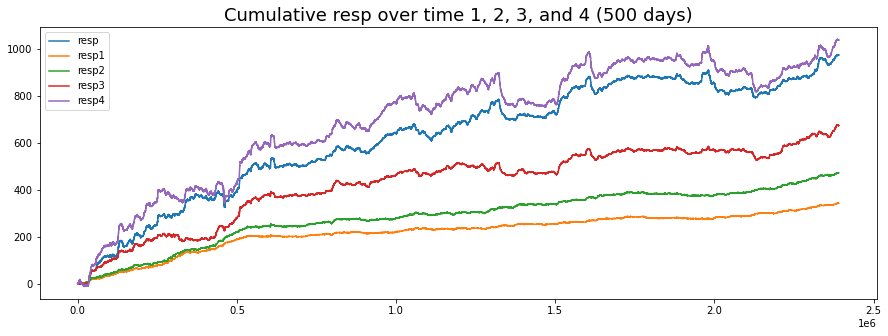

In [17]:

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title ("Cumulative resp over time 1, 2, 3, and 4 (500 days)", fontsize=18)
temp.resp.plot()
temp.resp1.plot()
temp.resp2.plot()
temp.resp3.plot()
temp.resp4.plot()
plt.legend(loc = 'upper left')
del temp
gc.collect()
